In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def f(x):
    return 4*x**2 - 3*x + 2

print (f(2))

12


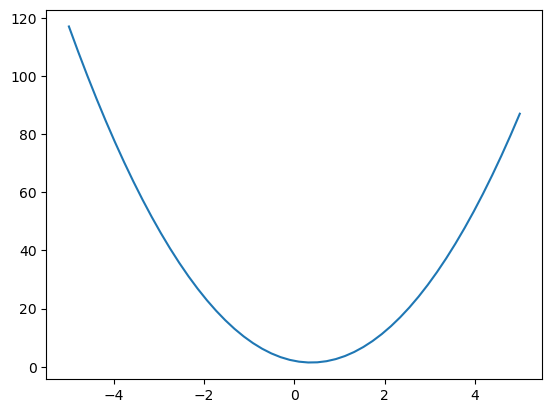

In [3]:
xs = np.linspace(-5, 5)
ys = f(xs)

plt.plot(xs, ys)

In [35]:
class Value:

    def __init__(self, data, _children = (), _op = '', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f'Value(data={self.data})'

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad
        out._backward = backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def backward():
            self.grad = out.grad * other.data
            other.grad = out.grad * self.data
        out._backward = backward
        
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")
        def backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = backward
        return out


In [14]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges
    
def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={'rankdir': "LR"}) #LR = left to right

    nodes, edges = trace(root)
    print ("In nodes set--------")
    for n in nodes:
        uid = str(id(n))
        print (f"node: {n}")
        #for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape="record")
        if n._op:
            print (f"node has operation: {n._op}")
            # if this value is a result of some operation, create an op node for it
            print (f"creating a node for {n._op}")
            dot.node(name = uid + n._op, label=n._op)
            # connect this node to it
            dot.edge(uid + n._op, uid)
            print (f"creating an edge for {n._op}")
            # print (n, uid + n._op, " ", uid)
            
    print ("\n\nIn edges set--------")
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        print (f"prinint edge for nodes {n1} and {n2}'s {n2._op}")
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot    


In nodes set--------
node: Value(data=-3.0)
node: Value(data=-2.0)
node: Value(data=-8.0)
node has operation: *
creating a node for *
creating an edge for *
node: Value(data=4.0)
node has operation: +
creating a node for +
creating an edge for +
node: Value(data=2.0)
node: Value(data=-6.0)
node has operation: *
creating a node for *
creating an edge for *
node: Value(data=10.0)


In edges set--------
prinint edge for nodes Value(data=10.0) and Value(data=4.0)'s +
prinint edge for nodes Value(data=-3.0) and Value(data=-6.0)'s *
prinint edge for nodes Value(data=2.0) and Value(data=-6.0)'s *
prinint edge for nodes Value(data=4.0) and Value(data=-8.0)'s *
prinint edge for nodes Value(data=-6.0) and Value(data=4.0)'s +
prinint edge for nodes Value(data=-2.0) and Value(data=-8.0)'s *


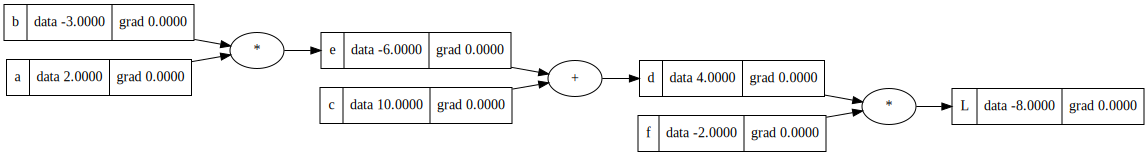

In [15]:
a = Value(2.0, label = 'a')
b = Value (-3.0, label = 'b')
c = Value (10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = "L"
L
draw_dot(L)


In [16]:
L.grad = 1.0

In [17]:
f.grad = 4.0
d.grad = -2.0

In [18]:
c.grad = -2.0
e.grad = -2.0

In [19]:
a.grad = (-2.0) * (-3.0)
b.grad = -2.0 * 2.0

In nodes set--------
node: Value(data=-3.0)
node: Value(data=-2.0)
node: Value(data=-8.0)
node has operation: *
creating a node for *
creating an edge for *
node: Value(data=4.0)
node has operation: +
creating a node for +
creating an edge for +
node: Value(data=2.0)
node: Value(data=-6.0)
node has operation: *
creating a node for *
creating an edge for *
node: Value(data=10.0)


In edges set--------
prinint edge for nodes Value(data=10.0) and Value(data=4.0)'s +
prinint edge for nodes Value(data=-3.0) and Value(data=-6.0)'s *
prinint edge for nodes Value(data=2.0) and Value(data=-6.0)'s *
prinint edge for nodes Value(data=4.0) and Value(data=-8.0)'s *
prinint edge for nodes Value(data=-6.0) and Value(data=4.0)'s +
prinint edge for nodes Value(data=-2.0) and Value(data=-8.0)'s *


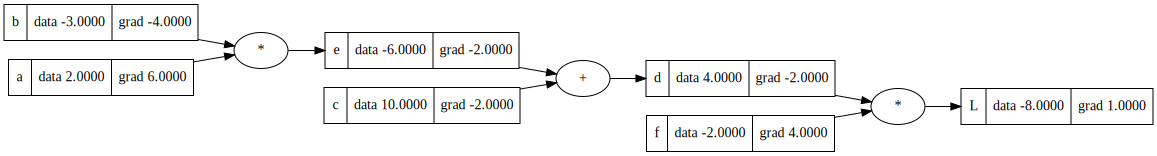

In [20]:
draw_dot(L)


In [11]:
# add a neuron

In [36]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value (-3.0, label='w1')
w2 = Value (1.0, label='w2')

#bias of the neuron
b1 = Value(6.8813735870195432, label='b1')

#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b1; n.label = 'n'
o = n.tanh()
o.label = "o"

In nodes set--------
node: Value(data=0.0)
node has operation: *
creating a node for *
creating an edge for *
node: Value(data=0.8813735870195432)
node has operation: +
creating a node for +
creating an edge for +
node: Value(data=1.0)
node: Value(data=6.881373587019543)
node: Value(data=0.0)
node: Value(data=2.0)
node: Value(data=-6.0)
node has operation: +
creating a node for +
creating an edge for +
node: Value(data=-6.0)
node has operation: *
creating a node for *
creating an edge for *
node: Value(data=0.7071067811865476)
node has operation: tanh
creating a node for tanh
creating an edge for tanh
node: Value(data=-3.0)


In edges set--------
prinint edge for nodes Value(data=0.0) and Value(data=-6.0)'s +
prinint edge for nodes Value(data=6.881373587019543) and Value(data=0.8813735870195432)'s +
prinint edge for nodes Value(data=-3.0) and Value(data=-6.0)'s *
prinint edge for nodes Value(data=0.0) and Value(data=0.0)'s *
prinint edge for nodes Value(data=-6.0) and Value(data=0.8813

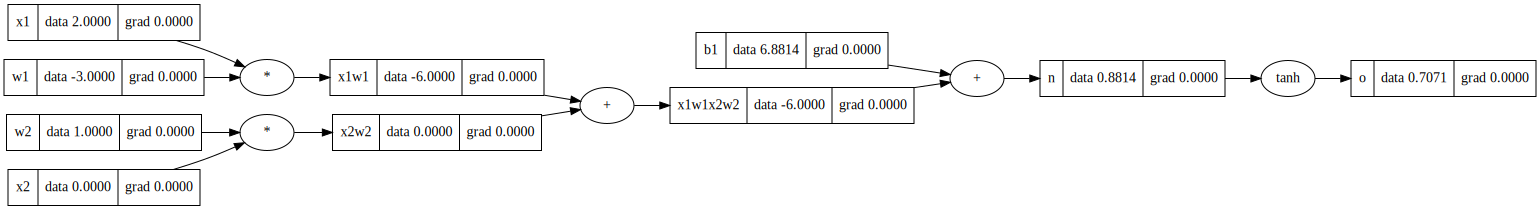

In [37]:
draw_dot(o)

In [38]:
o.grad = 1.0
o._backward()
n._backward()
b1._backward()
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()
x1._backward()
x2._backward()
w1._backward()
w2._backward()



In nodes set--------
node: Value(data=0.0)
node has operation: *
creating a node for *
creating an edge for *
node: Value(data=0.8813735870195432)
node has operation: +
creating a node for +
creating an edge for +
node: Value(data=1.0)
node: Value(data=6.881373587019543)
node: Value(data=0.0)
node: Value(data=2.0)
node: Value(data=-6.0)
node has operation: +
creating a node for +
creating an edge for +
node: Value(data=-6.0)
node has operation: *
creating a node for *
creating an edge for *
node: Value(data=0.7071067811865476)
node has operation: tanh
creating a node for tanh
creating an edge for tanh
node: Value(data=-3.0)


In edges set--------
prinint edge for nodes Value(data=0.0) and Value(data=-6.0)'s +
prinint edge for nodes Value(data=6.881373587019543) and Value(data=0.8813735870195432)'s +
prinint edge for nodes Value(data=-3.0) and Value(data=-6.0)'s *
prinint edge for nodes Value(data=0.0) and Value(data=0.0)'s *
prinint edge for nodes Value(data=-6.0) and Value(data=0.8813

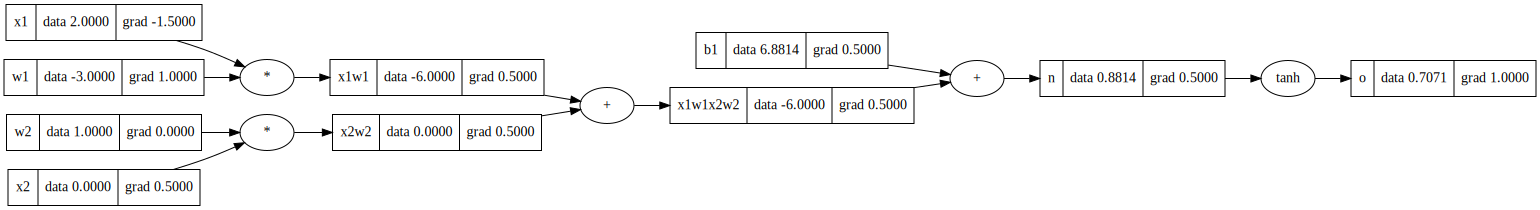

In [39]:
draw_dot(o)